In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

In [3]:
df = pd.read_csv("data/1-min_2020-06-09_2022-09-02.csv")

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
kessel,1168600.0,30.606007,13.771841,15.7,22.8,25.4,31.5,89.5
ruecklauf,1168600.0,26.294181,12.141199,12.4,19.8,22.1,25.8,85.7
abgas,1168600.0,25.255986,39.455655,0.0,10.0,13.0,20.0,245.0
co2_soll,1168600.0,12.000000,0.000000,12.0,12.0,12.0,12.0,12.0
co2_ist,1168600.0,5.634163,5.497446,0.0,0.0,6.0,9.3,17.5
saugzug_ist,1168600.0,8689.199917,1226.684038,1000.0,9000.0,9000.0,9000.0,9000.0
puffer_oben,1168600.0,50.634010,14.909075,22.4,39.6,49.5,62.4,89.3
puffer_unten,1168600.0,36.289248,9.563931,15.6,29.1,34.8,42.3,86.3
platine,1168600.0,25.243898,4.810775,17.5,22.1,24.6,26.8,59.0
betriebsphase_kessel,1168600.0,0.139158,0.575015,0.0,0.0,0.0,0.0,8.0


In [5]:
# Correct data types
def print_df_dtypes(df):
    print("data types:")
    for column, dtype in zip(df.columns, df.dtypes):
        print("\t", column, ":", dtype)

def update_type(df, col, type):
    df[col] = df[col].astype(type)
        
print("Original", end =" ")
print_df_dtypes(df)

update_type(df, 'betriebsphase_kessel', pd.CategoricalDtype())
update_type(df, 'betriebsphase_hk1', pd.CategoricalDtype())
update_type(df, 'betriebsphase_hk2', pd.CategoricalDtype())
update_type(df, 'abgas', 'float64')
update_type(df, 'co2_soll', 'float64')
update_type(df, 'saugzug_ist', 'float64')
for c in ["di_0", "di_1", "di_2", "di_3", "a_w_0","a_w_1", "a_w_2","a_w_3","a_ea_0","a_ea_1", "a_ea_2","a_ea_3","a_ea_4","a_phase_0","a_phase_1","a_phase_2","a_phase_3","a_phase_4"]:
    update_type(df, c, 'bool')

print()
print("Updated", end =" ")
print_df_dtypes(df)

Original data types:
	 sps_zeit : object
	 received_time : object
	 kessel : float64
	 ruecklauf : float64
	 abgas : int64
	 co2_soll : int64
	 co2_ist : float64
	 saugzug_ist : int64
	 puffer_oben : float64
	 puffer_unten : float64
	 platine : float64
	 betriebsphase_kessel : int64
	 aussen : float64
	 vorlauf_hk1_ist : float64
	 vorlauf_hk1_soll : float64
	 betriebsphase_hk1 : int64
	 vorlauf_hk2_ist : float64
	 vorlauf_hk2_soll : float64
	 betriebsphase_hk2 : int64
	 boiler_1 : float64
	 di_0 : int64
	 di_1 : int64
	 di_2 : int64
	 di_3 : int64
	 a_w_0 : int64
	 a_w_1 : int64
	 a_w_2 : int64
	 a_w_3 : int64
	 a_ea_0 : int64
	 a_ea_1 : int64
	 a_ea_2 : int64
	 a_ea_3 : int64
	 a_ea_4 : int64
	 a_phase_0 : int64
	 a_phase_1 : int64
	 a_phase_2 : int64
	 a_phase_3 : int64
	 a_phase_4 : int64

Updated data types:
	 sps_zeit : object
	 received_time : object
	 kessel : float64
	 ruecklauf : float64
	 abgas : float64
	 co2_soll : float64
	 co2_ist : float64
	 saugzug_ist : float64
	 puffe

In [6]:
df.drop(["sps_zeit"], axis=1, inplace=True)
df.describe().T
#df.drop(["sps_zeit", "betriebsphase_kessel", "betriebsphase_hk1", "betriebsphase_hk2", "di_0", "di_1", "di_2", "di_3", "a_w_0","a_w_1", "a_w_2","a_w_3","a_ea_0","a_ea_1", "a_ea_2","a_ea_3","a_ea_4","a_phase_0","a_phase_1","a_phase_2","a_phase_3","a_phase_4"], axis=1, inplace=True)
#df

,count,mean,std,min,25%,50%,75%,max
kessel,1168600.0,30.606007,13.771841,15.7,22.8,25.4,31.5,89.5
ruecklauf,1168600.0,26.294181,12.141199,12.4,19.8,22.1,25.8,85.7
abgas,1168600.0,25.255986,39.455655,0.0,10.0,13.0,20.0,245.0
co2_soll,1168600.0,12.000000,0.000000,12.0,12.0,12.0,12.0,12.0
co2_ist,1168600.0,5.634163,5.497446,0.0,0.0,6.0,9.3,17.5
saugzug_ist,1168600.0,8689.199917,1226.684038,1000.0,9000.0,9000.0,9000.0,9000.0
puffer_oben,1168600.0,50.634010,14.909075,22.4,39.6,49.5,62.4,89.3
puffer_unten,1168600.0,36.289248,9.563931,15.6,29.1,34.8,42.3,86.3
platine,1168600.0,25.243898,4.810775,17.5,22.1,24.6,26.8,59.0
aussen,1168600.0,13.765366,8.595091,-5.4,6.4,13.6,20.6,35.8


In [7]:
timestamps = pd.to_datetime(df.pop("received_time"))

In [8]:
timestamps

0         2020-06-09 16:43:32.943731
1         2020-06-09 16:45:24.995442
2         2020-06-09 16:46:29.944035
3         2020-06-09 16:47:28.939817
4         2020-06-09 16:48:27.938373
                     ...            
1168595   2022-09-02 07:14:42.291005
1168596   2022-09-02 07:15:41.289580
1168597   2022-09-02 07:16:40.289253
1168598   2022-09-02 07:17:39.287700
1168599   2022-09-02 07:18:38.286722
Name: received_time, Length: 1168600, dtype: datetime64[ns]

In [9]:
df.index = timestamps

In [10]:
df

,kessel,ruecklauf,abgas,co2_soll,co2_ist,saugzug_ist,puffer_oben,puffer_unten,platine,betriebsphase_kessel,...,a_ea_0,a_ea_1,a_ea_2,a_ea_3,a_ea_4,a_phase_0,a_phase_1,a_phase_2,a_phase_3,a_phase_4
received_time,,,,,,,,,,,,,,,,,,,,,
2020-06-09 16:43:32.943731,26.9,22.4,13.0,12.0,0.0,9000.0,63.3,42.9,24.9,0,...,True,True,True,False,False,False,False,False,False,False
2020-06-09 16:45:24.995442,26.9,22.4,13.0,12.0,0.0,9000.0,63.3,42.9,24.9,0,...,True,True,True,False,False,False,False,False,False,False
2020-06-09 16:46:29.944035,26.9,22.4,13.0,12.0,4.9,9000.0,63.3,42.8,24.9,0,...,True,True,True,False,False,False,False,False,False,False
2020-06-09 16:47:28.939817,26.9,22.5,13.0,12.0,9.5,9000.0,63.3,42.9,24.9,0,...,True,True,True,False,False,False,False,False,False,False
2020-06-09 16:48:27.938373,26.9,22.5,13.0,12.0,8.7,9000.0,63.3,42.9,24.9,0,...,True,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-02 07:14:42.291005,23.1,21.8,11.0,12.0,0.0,9000.0,41.4,29.7,25.7,0,...,True,True,True,False,False,False,False,False,False,False
2022-09-02 07:15:41.289580,23.1,21.8,11.0,12.0,0.0,9000.0,41.4,34.3,25.7,0,...,True,True,True,False,False,False,False,False,False,False
2022-09-02 07:16:40.289253,23.1,21.8,11.0,12.0,17.4,9000.0,41.4,36.1,25.7,0,...,True,True,True,False,False,False,False,False,False,False


2 Week timespan with 2 times heating up in summer: `2021-08-19T15:00:00` - `2021-09-02T15:00:00` \
2 Week timespan with 7 times heating up in winter: `2022-01-02T15:00:00` - `2022-01-16T15:00:00` \
12 hour timespan with 1 time heating up in winter: `2022-01-02T18:00:00` - `2022-01-03T06:00:00`

In [11]:
#two_summer_weeks = (df.index >= '2021-08-19T15:00:00') & (df.index < '2021-09-02T15:00:00')
#two_winter_weeks = (df.index >= '2022-01-02T15:00:00') & (df.index < '2022-01-16T15:00:00')
#twelve_winter_hours = (df.index >= '2022-01-02T18:00:00') & (df.index < '2022-01-03T06:00:00')

two_summer_weeks = lambda table: (table.index >= '2021-08-19T15:00:00') & (table.index < '2021-09-02T15:00:00')
two_winter_weeks = lambda table: (table.index >= '2022-01-02T15:00:00') & (table.index < '2022-01-16T15:00:00')
twelve_winter_hours = lambda table: (table.index >= '2022-01-02T18:00:00') & (table.index < '2022-01-03T06:00:00')

In [14]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (16, 20)
mpl.rcParams['axes.grid'] = False

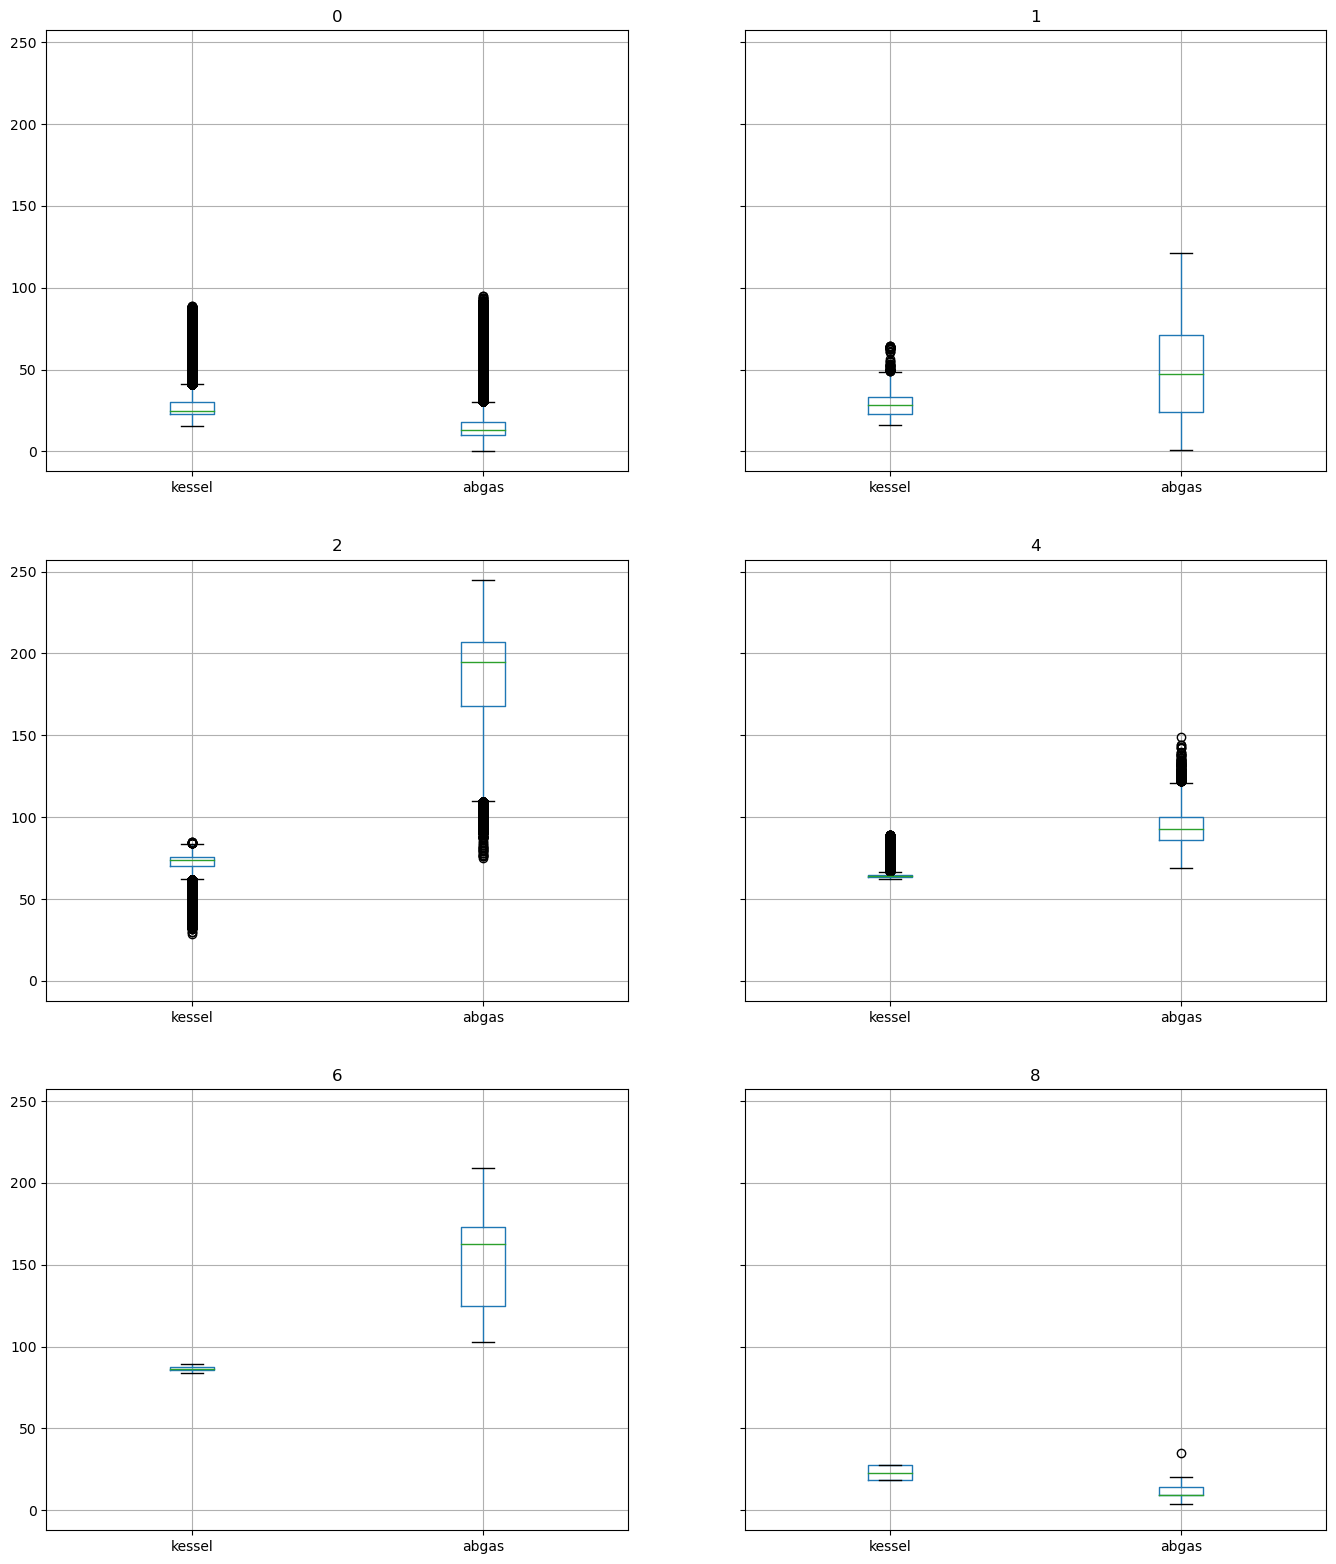

In [19]:
_ = df[['kessel', 'abgas', 'betriebsphase_kessel']].groupby(df.betriebsphase_kessel).boxplot()

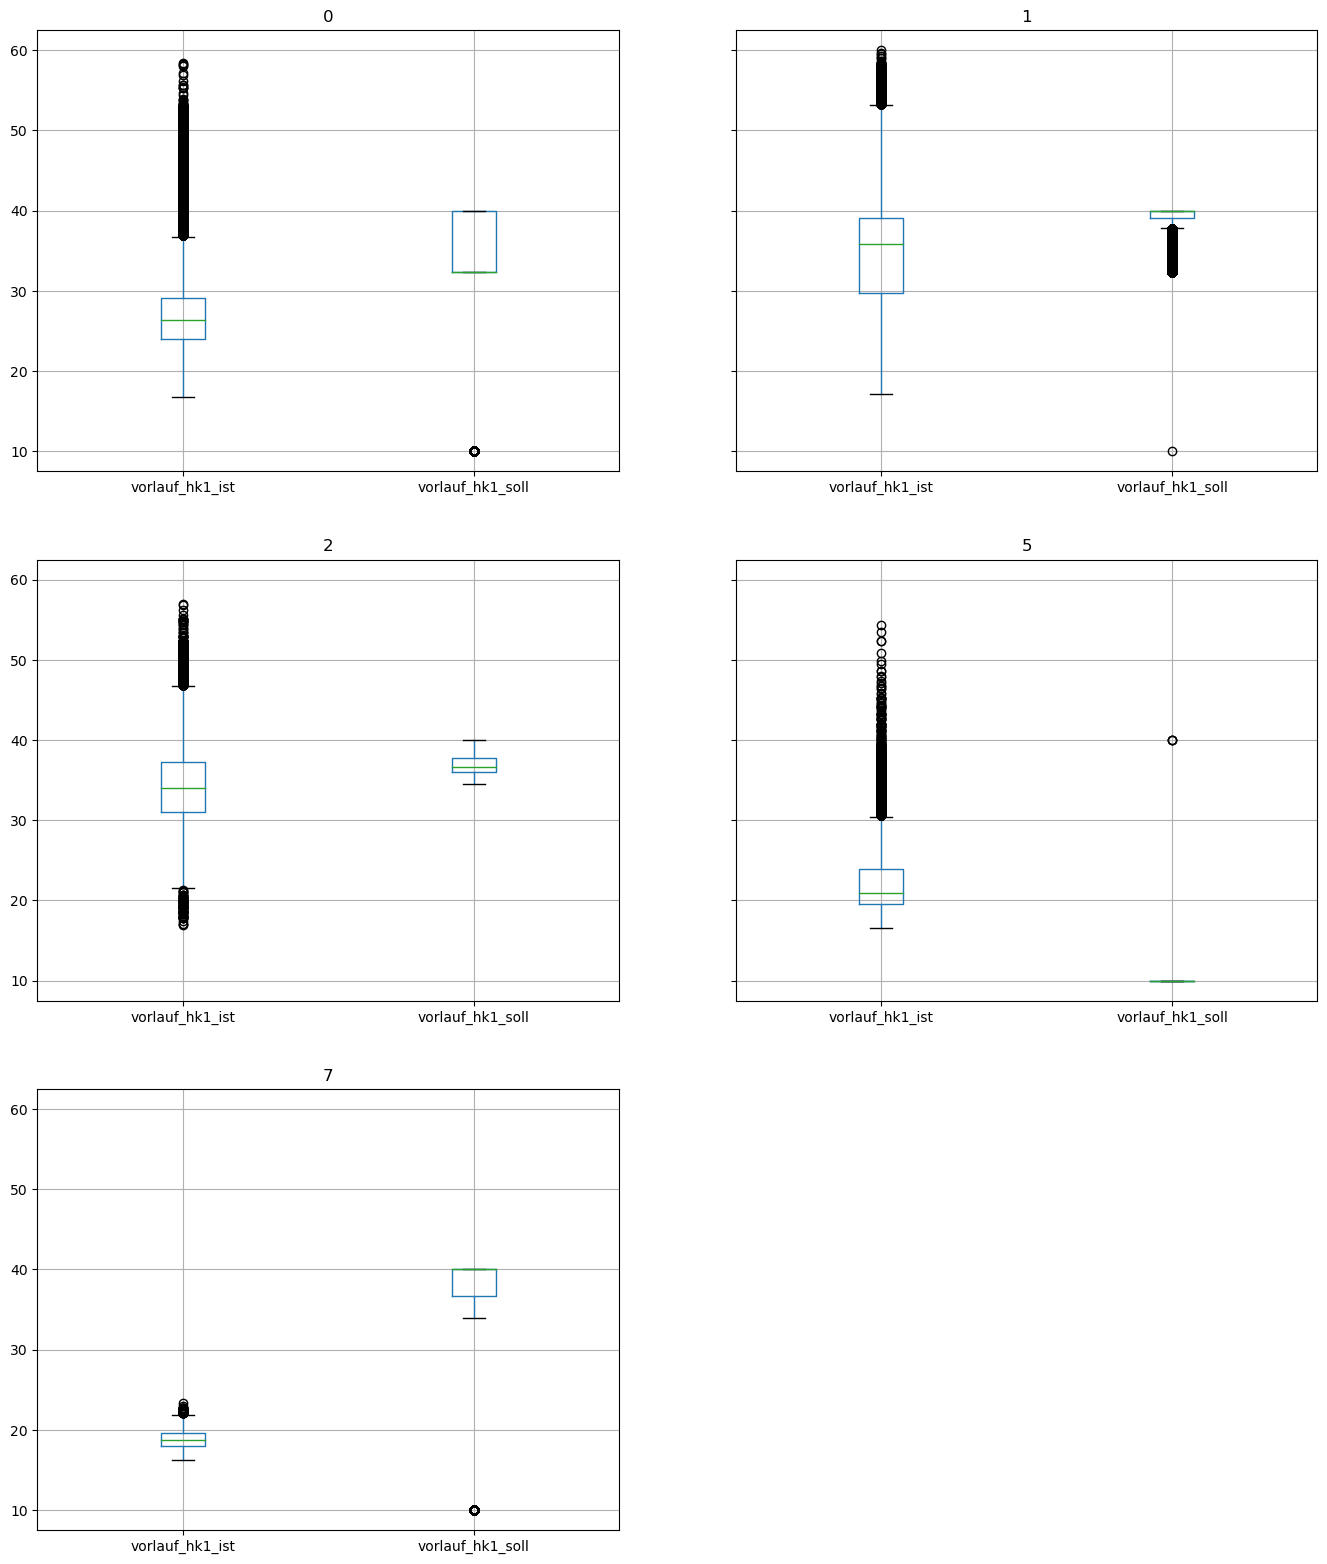

In [21]:
_ = df[['vorlauf_hk1_ist', 'vorlauf_hk1_soll', 'betriebsphase_hk1']].groupby(df['betriebsphase_hk1']).boxplot()

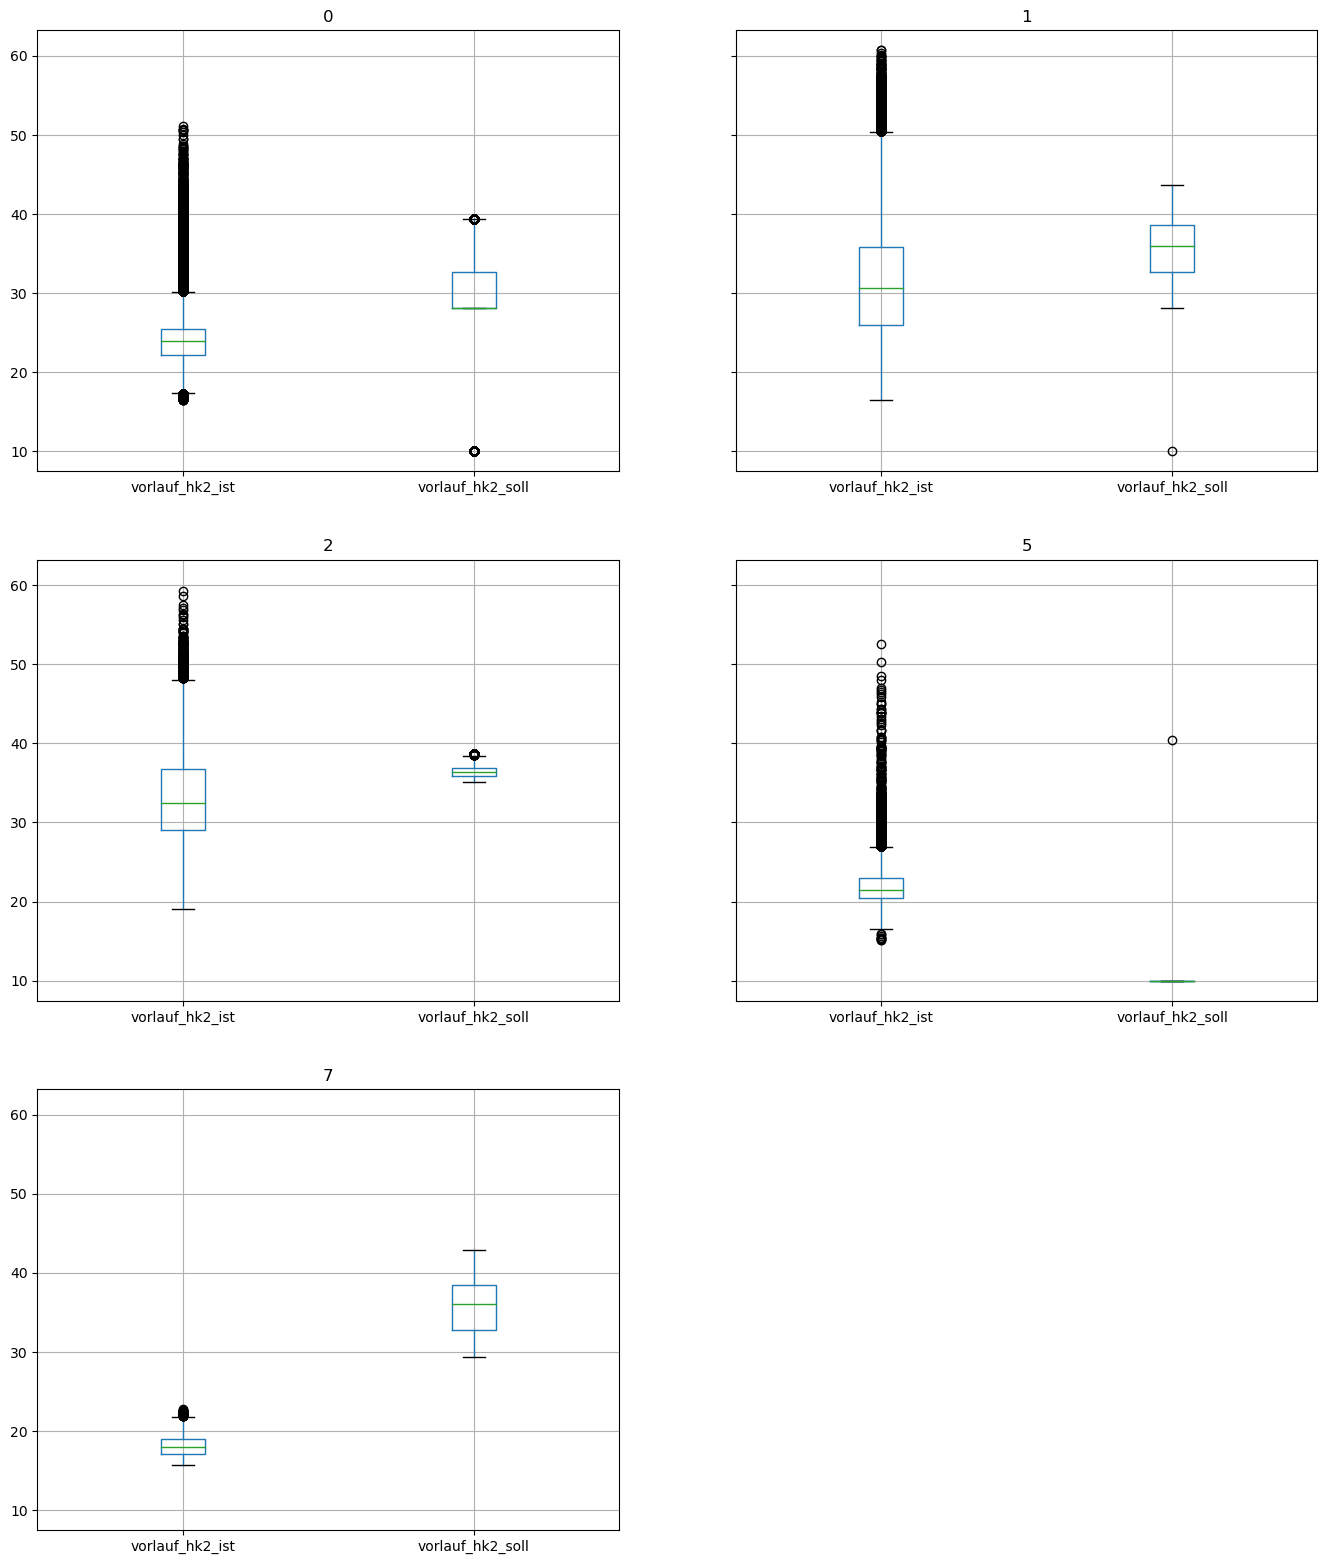

In [22]:
_ = df[['vorlauf_hk2_ist', 'vorlauf_hk2_soll', 'betriebsphase_hk2']].groupby(df['betriebsphase_hk2']).boxplot()

### Before resampling

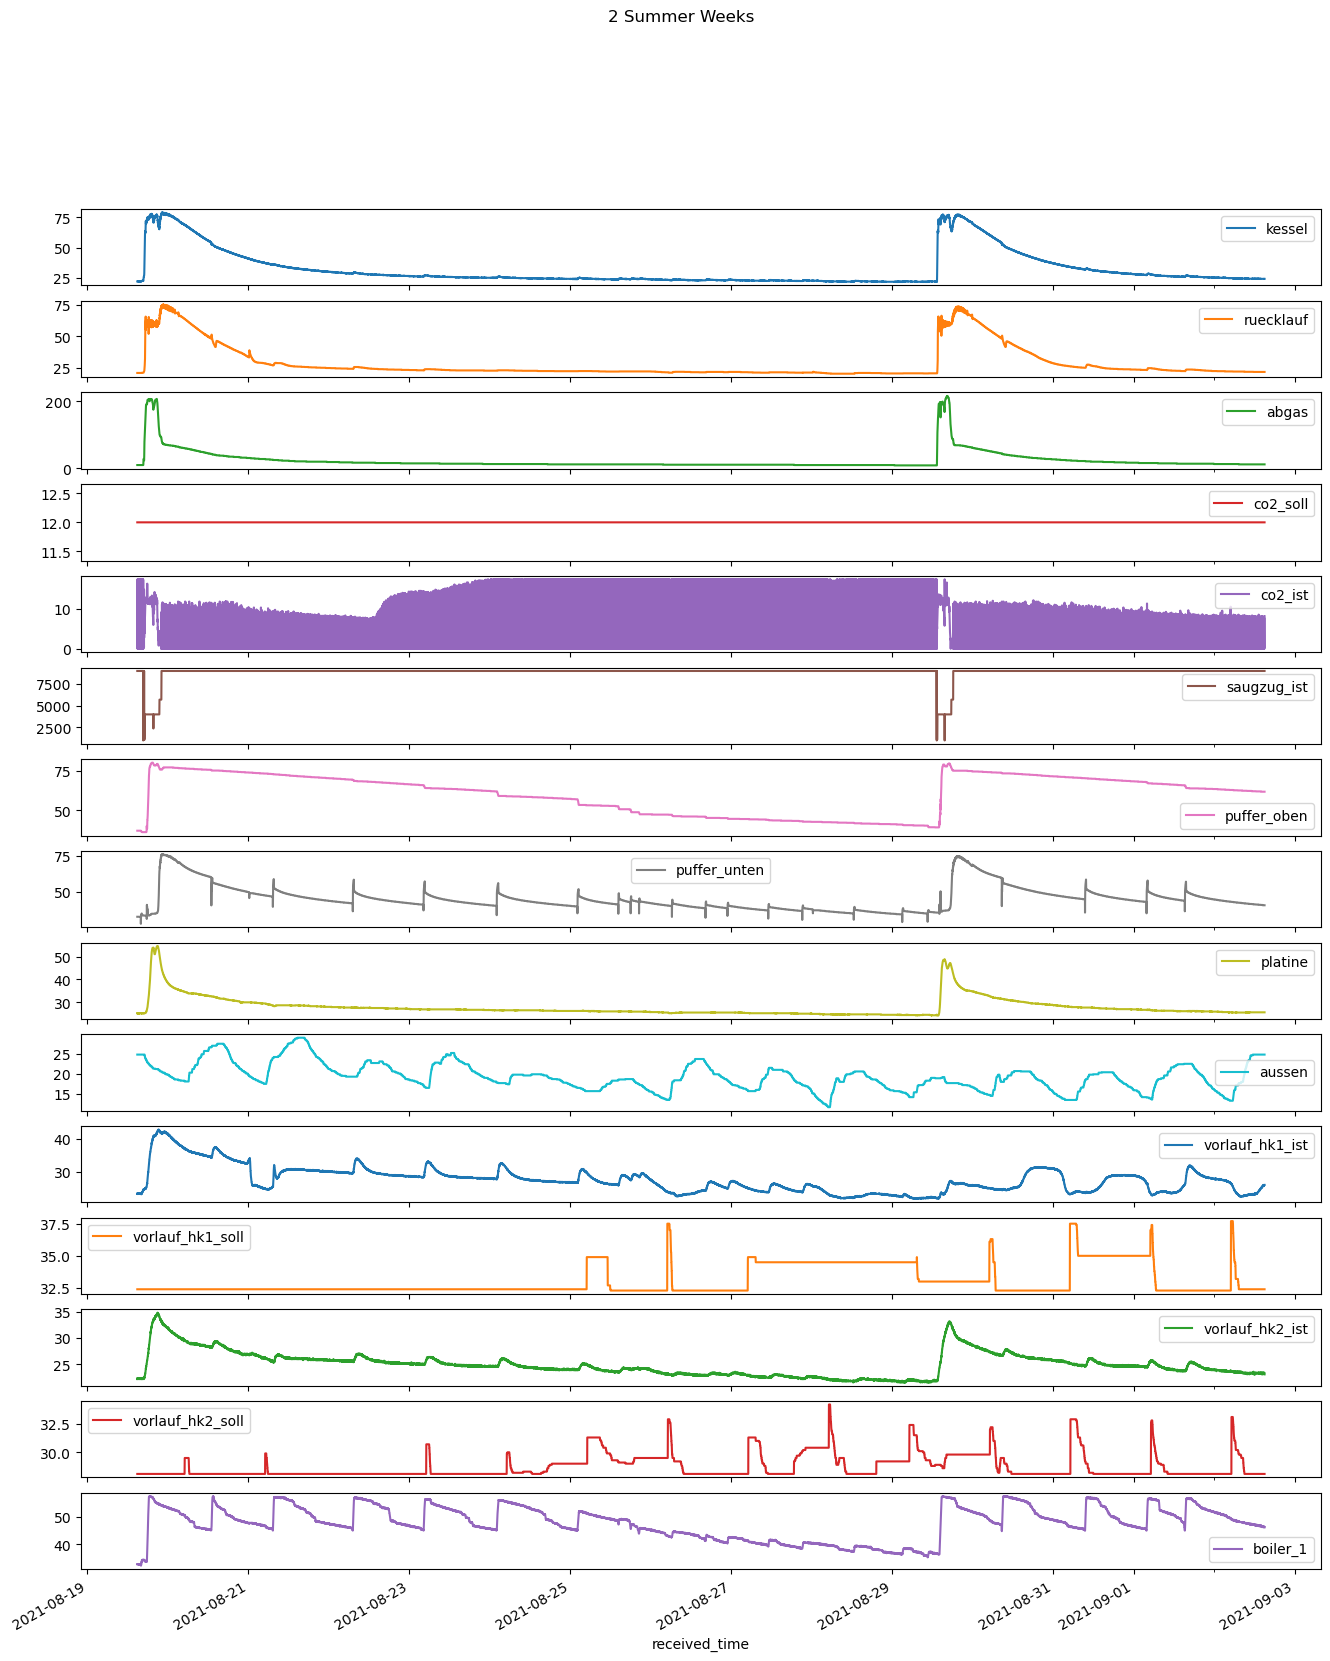

In [23]:
_ = df[two_summer_weeks(df)].plot(subplots=True, title="2 Summer Weeks")

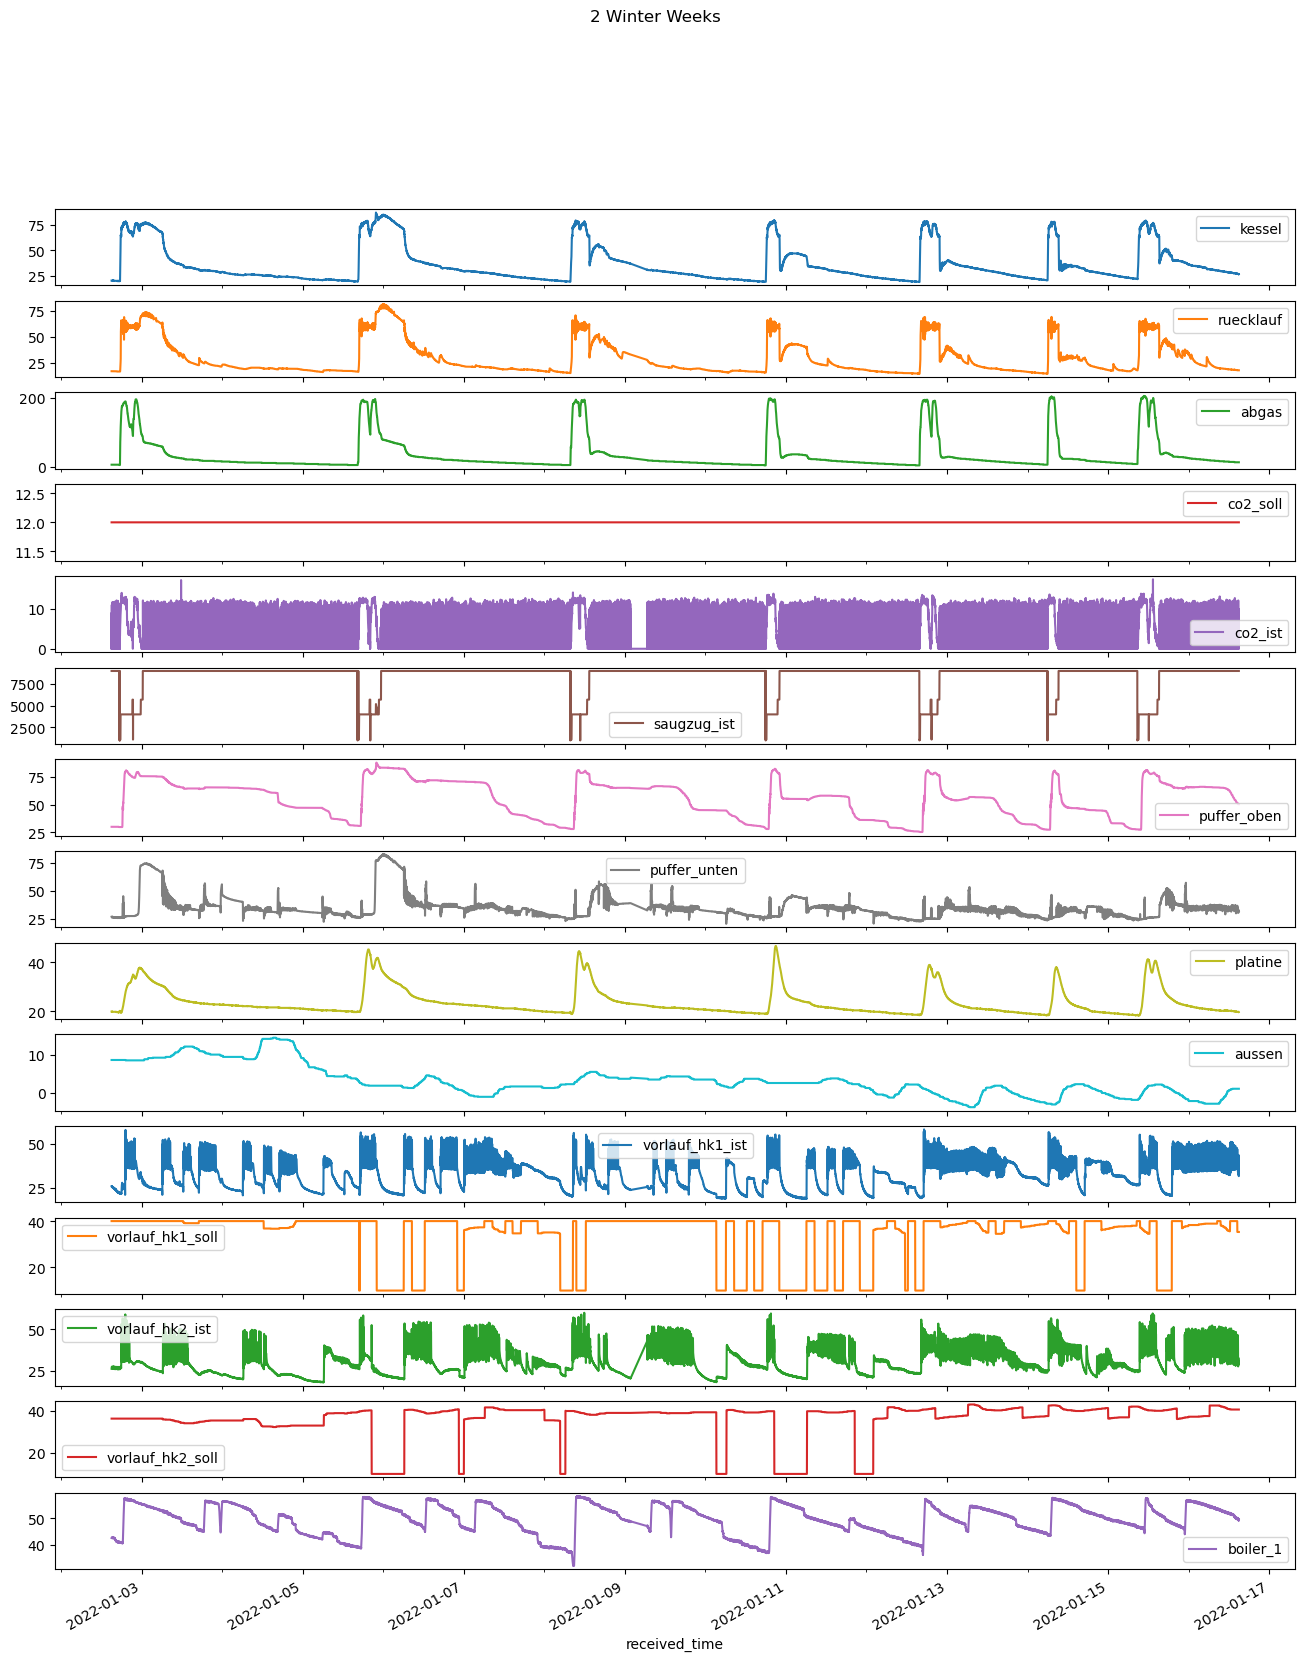

In [24]:
_ = df[two_winter_weeks(df)].plot(subplots=True, title="2 Winter Weeks")

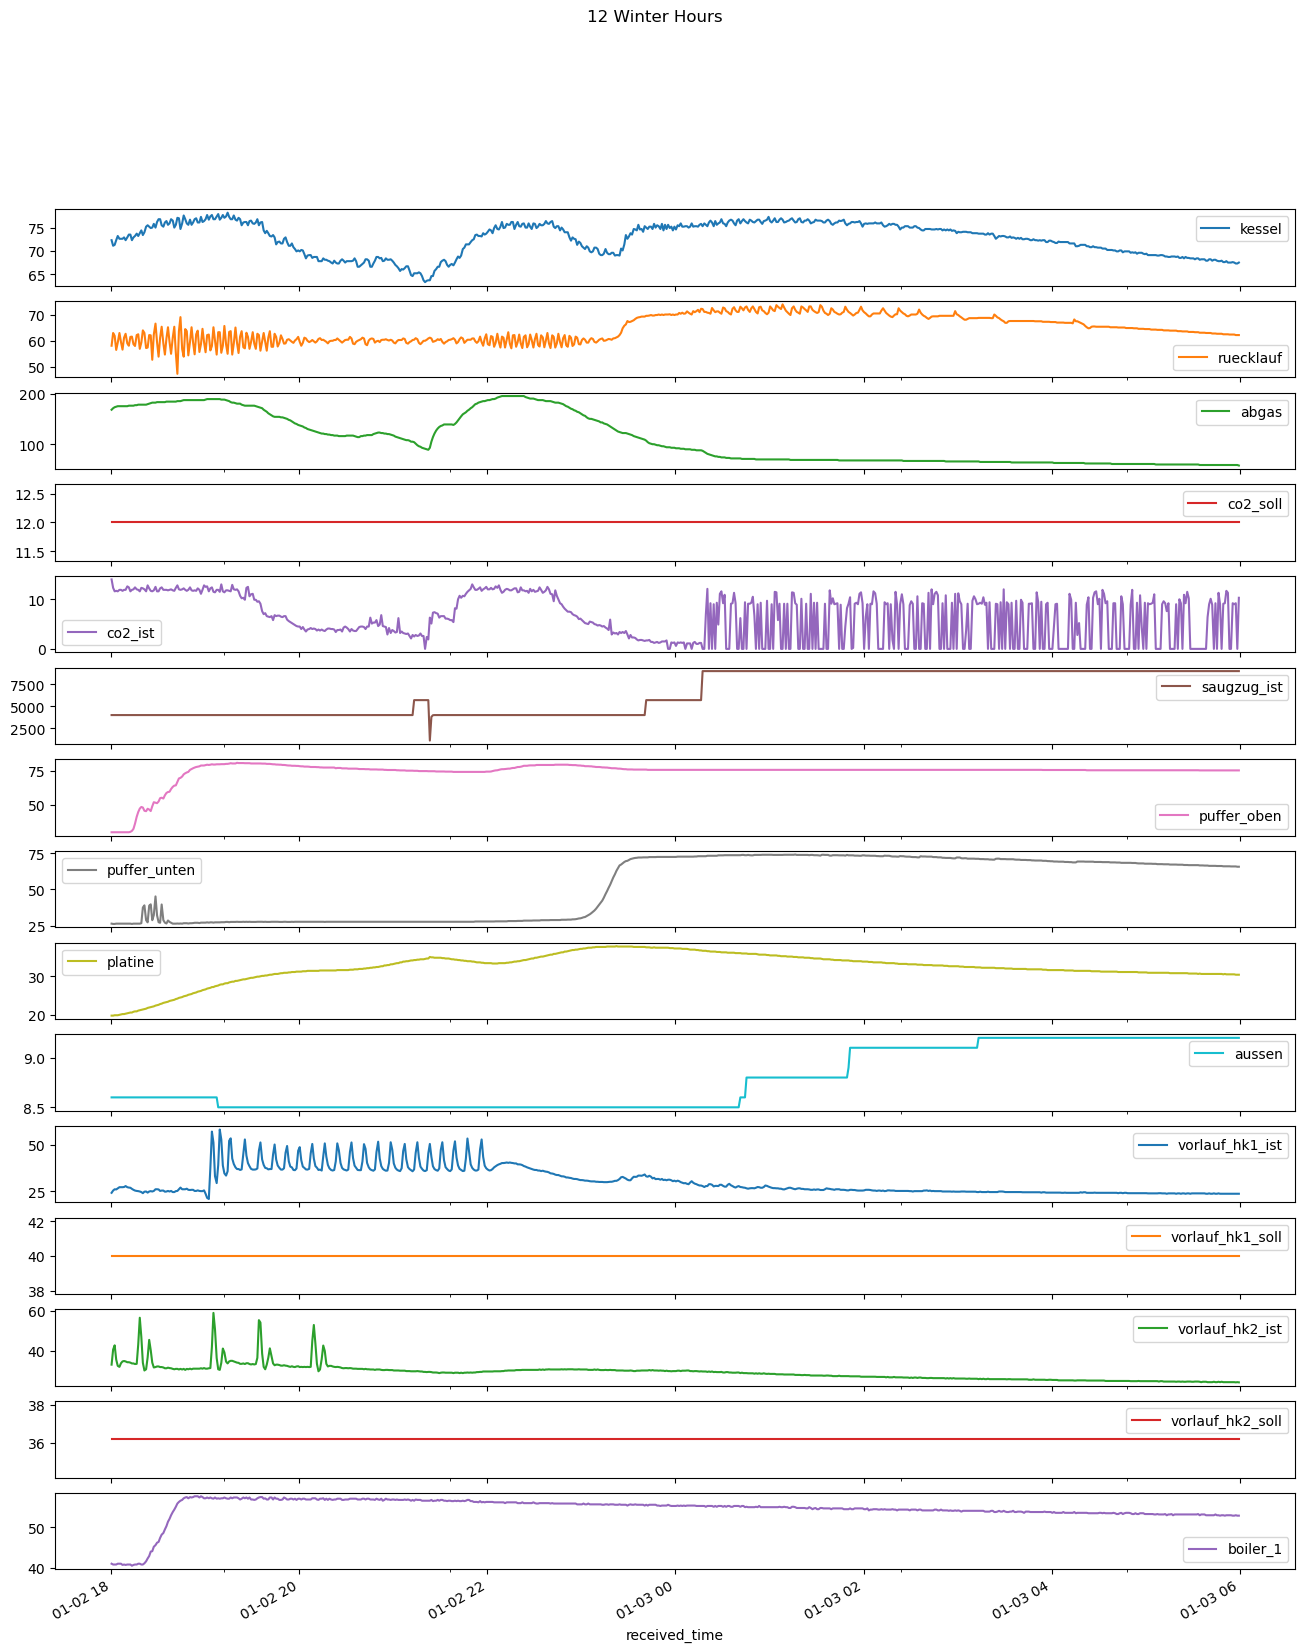

In [25]:
_ = df[twelve_winter_hours(df)].plot(subplots=True, title="12 Winter Hours")

I'm not sure I fully understand the implications of resampling. I want to smooth out the curve and reduce the noise as well as the number of data points. Using a rolling average would incorporate future values in the mean which I understand is bad. Still I'm not sure if what I'm doing here is correct.

Why exactly am I trying to reduce the number of data points? I think it's a good idea to remove noise (by smoothing out with some sort of rolling average (maybe only incorporating past values)) but that's only for certain columns that are noisy like some vorlauf ones. For categorical and boolean data it makes no sense to smooth or resample with some average, maybe with a mode but even then I don't see why reducing the number is even necessary. For inconsistent features like the CO2 which seems to jump and be noisy in unpredictable patterns, you might need another thing because smoothing would probably be very misleading. There might be an error in the sensor and as long as there's no fire, the CO2 should be stable instead of jumping around.

In [26]:
resampled = df.resample('3min').mean()
resampled

,kessel,ruecklauf,abgas,co2_soll,co2_ist,saugzug_ist,puffer_oben,puffer_unten,platine,aussen,...,a_ea_0,a_ea_1,a_ea_2,a_ea_3,a_ea_4,a_phase_0,a_phase_1,a_phase_2,a_phase_3,a_phase_4
received_time,,,,,,,,,,,,,,,,,,,,,
2020-06-09 16:42:00,26.900000,22.400000,13.0,12.0,0.000000,9000.0,63.3,42.900000,24.900000,14.2,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-06-09 16:45:00,26.900000,22.433333,13.0,12.0,4.800000,9000.0,63.3,42.866667,24.900000,14.2,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-06-09 16:48:00,26.933333,22.500000,13.0,12.0,3.233333,9000.0,63.3,42.900000,24.900000,14.2,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-06-09 16:51:00,26.900000,22.400000,13.0,12.0,2.833333,9000.0,63.3,42.733333,24.900000,14.2,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-06-09 16:54:00,26.833333,22.433333,13.0,12.0,2.933333,9000.0,63.3,42.466667,24.900000,14.2,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-02 07:06:00,23.100000,21.800000,11.0,12.0,7.200000,9000.0,41.4,36.100000,25.733333,18.7,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-02 07:09:00,23.100000,21.800000,11.0,12.0,2.633333,9000.0,41.4,36.100000,25.700000,18.7,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-02 07:12:00,23.100000,21.800000,11.0,12.0,6.666667,9000.0,41.4,33.966667,25.700000,18.7,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


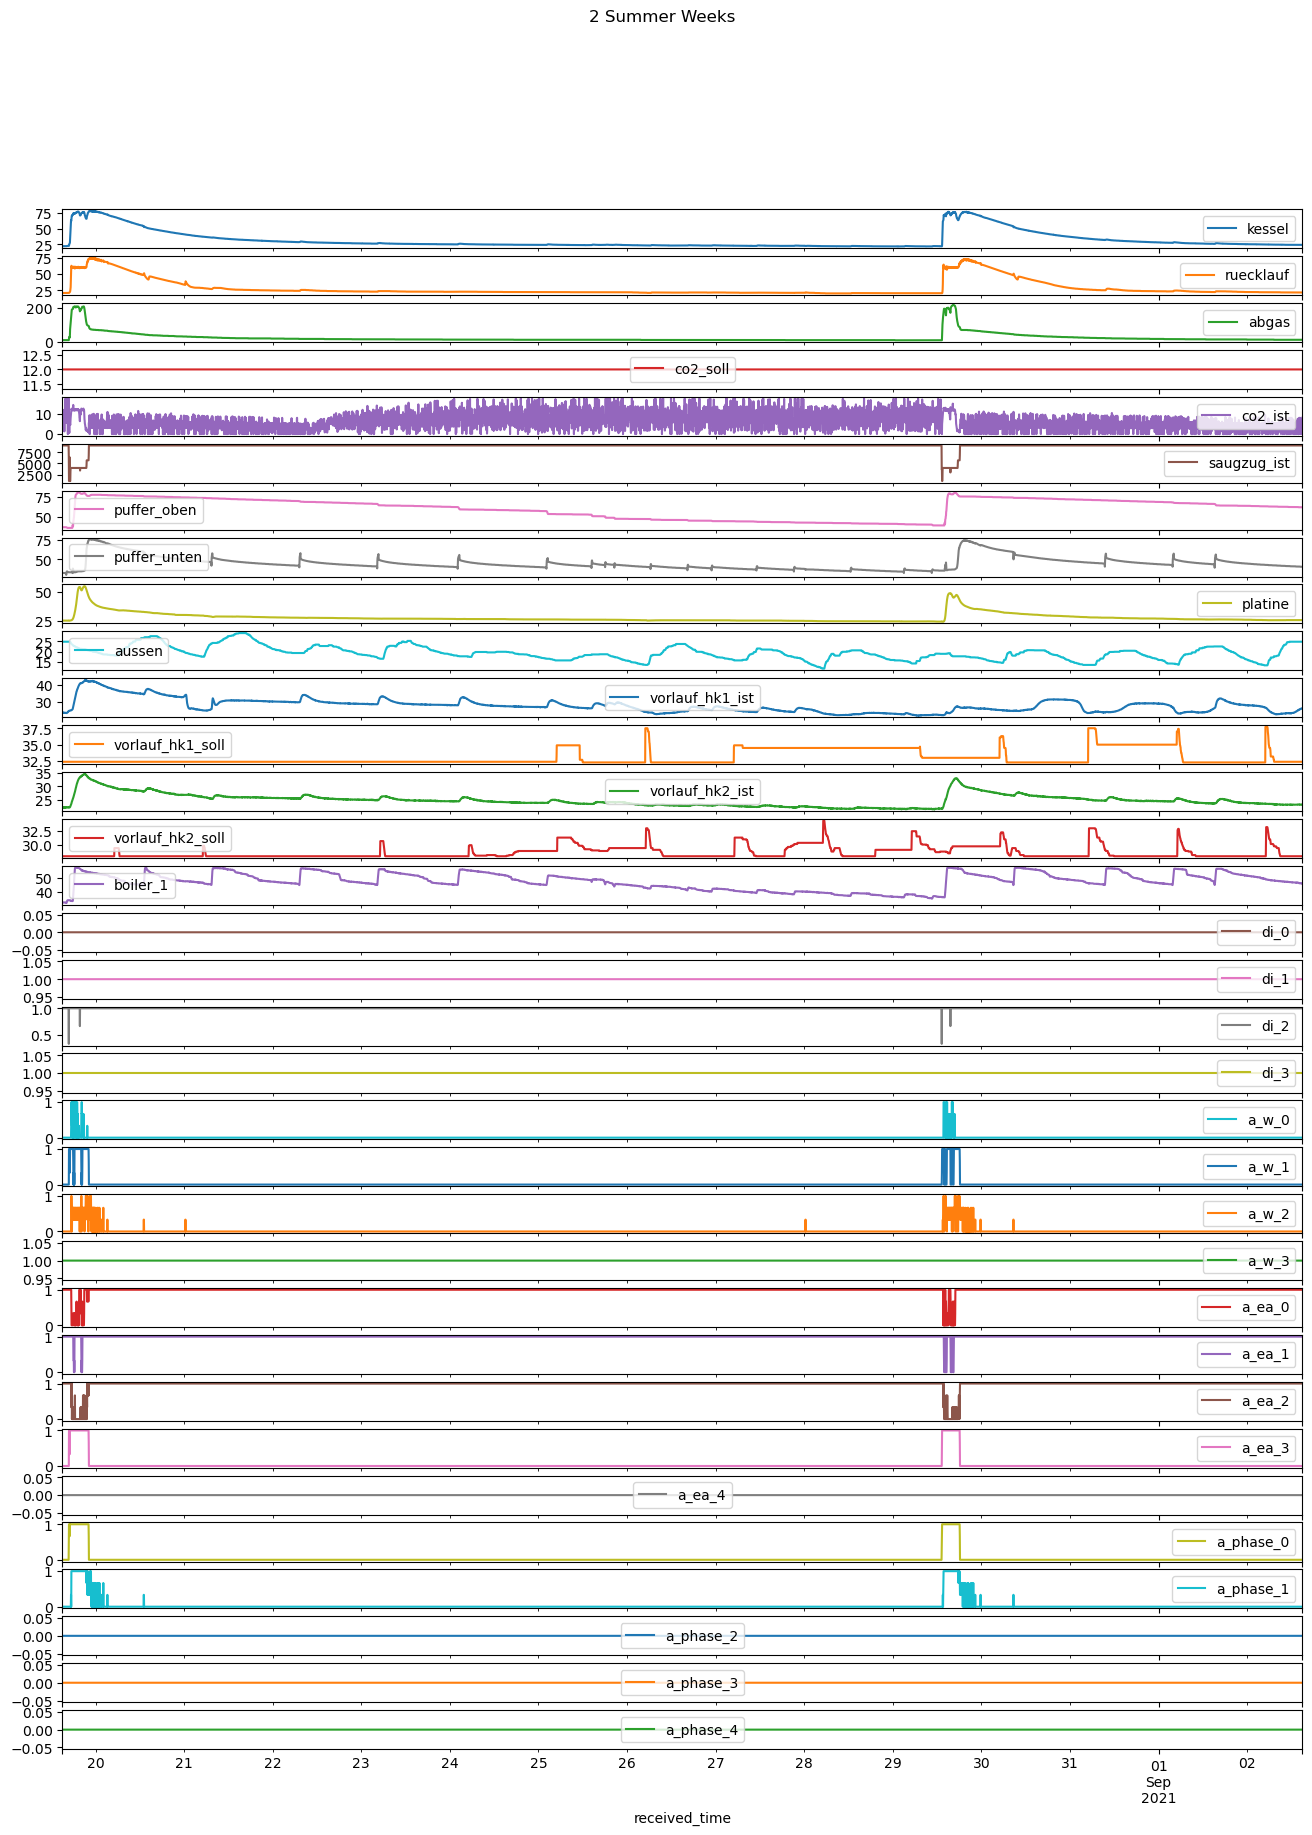

In [27]:
_ = resampled[two_summer_weeks(resampled)].plot(subplots=True, title="2 Summer Weeks")

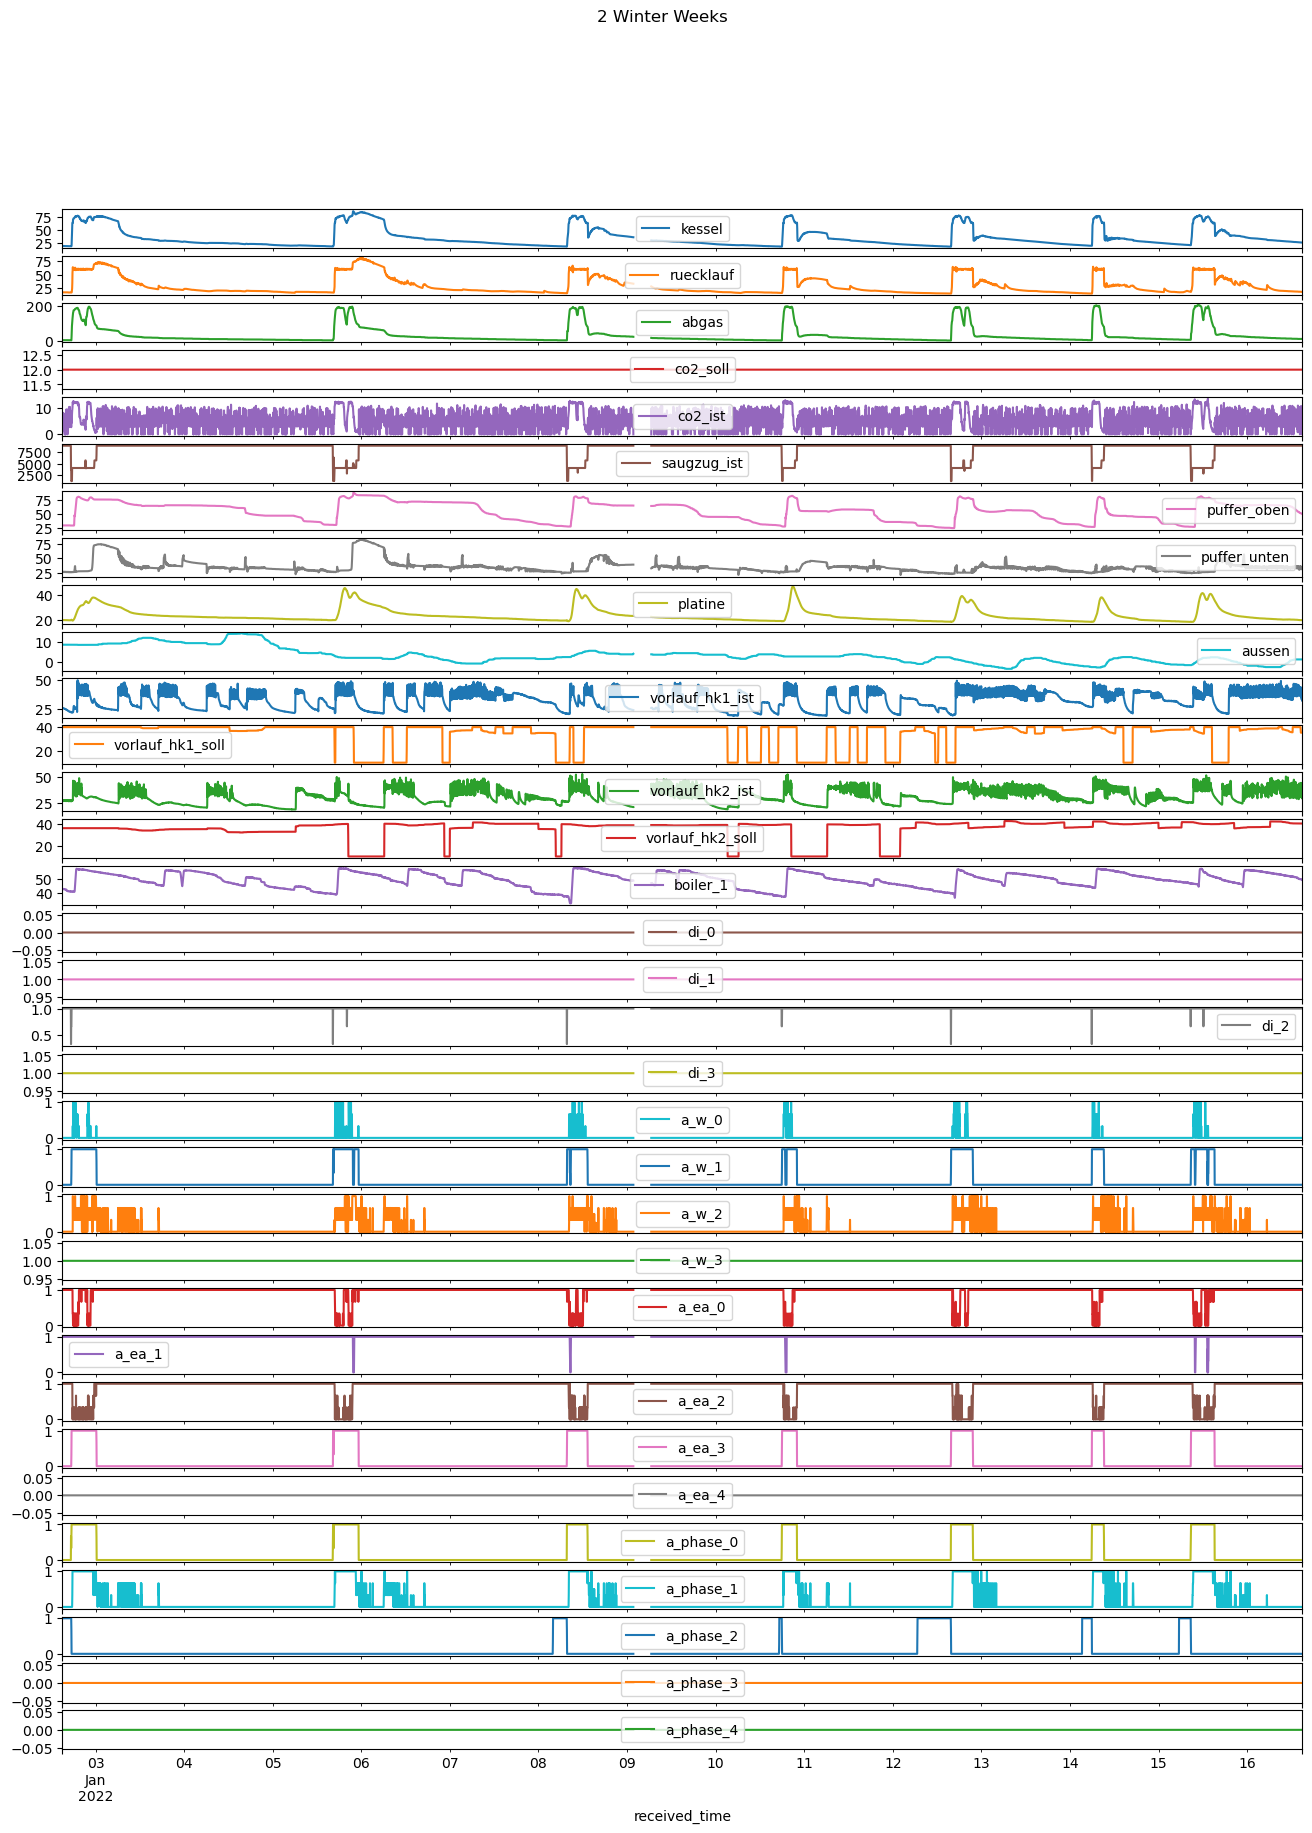

In [28]:
_ = resampled[two_winter_weeks(resampled)].plot(subplots=True, title="2 Winter Weeks")

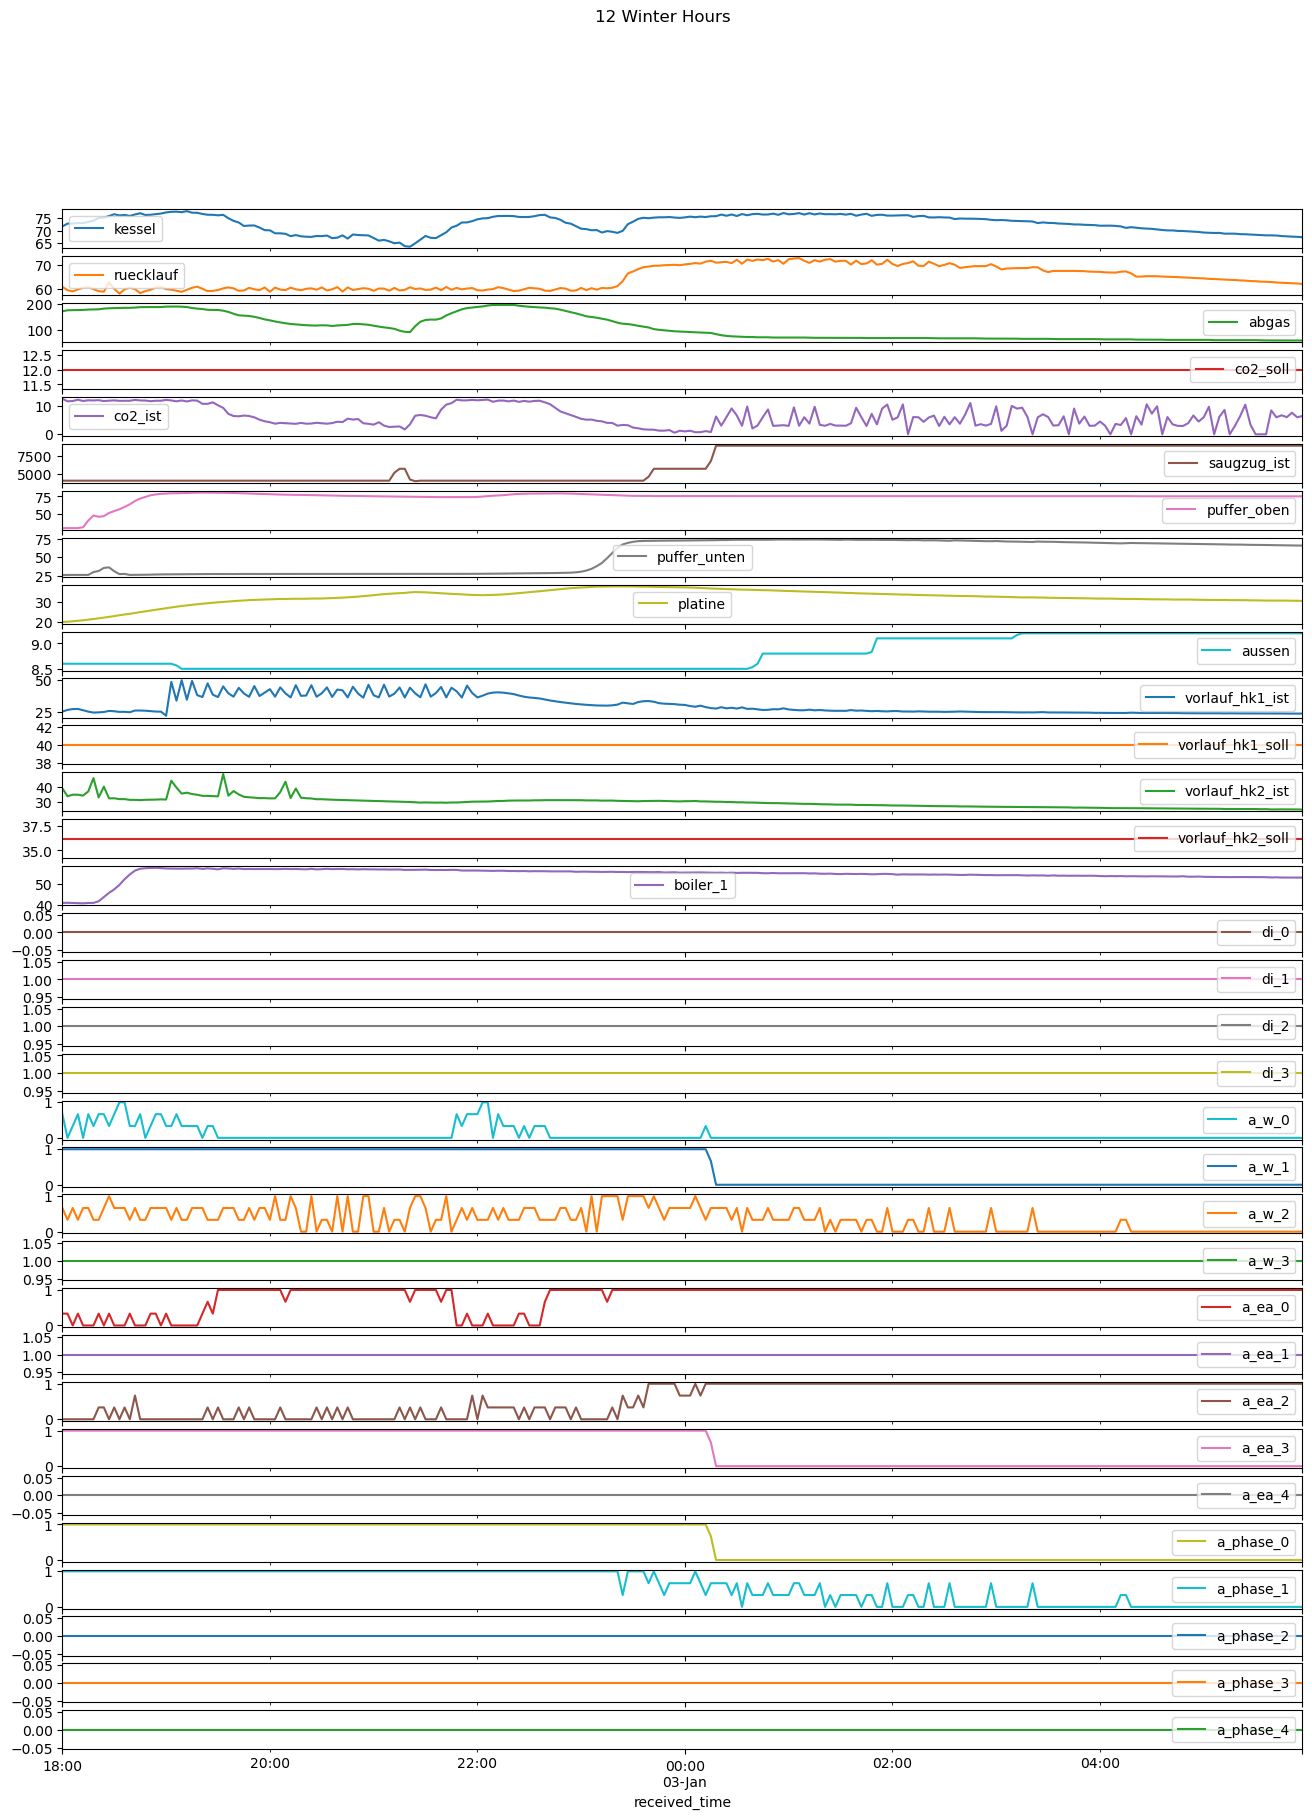

In [29]:
_ = resampled[twelve_winter_hours(resampled)].plot(subplots=True, title="12 Winter Hours")

The summary of the data frame looks plausible :)

In [30]:
resampled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
kessel,389745.0,30.606628,13.769996,15.766667,22.800000,25.400000,31.500000,88.866667
ruecklauf,389745.0,26.294762,12.124216,12.400000,19.800000,22.100000,25.800000,85.533333
abgas,389745.0,25.257273,39.453346,0.000000,10.000000,13.000000,20.000000,244.666667
co2_soll,389745.0,12.000000,0.000000,12.000000,12.000000,12.000000,12.000000,12.000000
co2_ist,389745.0,5.634204,3.549773,0.000000,3.000000,5.800000,7.433333,17.500000
saugzug_ist,389745.0,8689.166533,1219.665855,1000.000000,9000.000000,9000.000000,9000.000000,9000.000000
puffer_oben,389745.0,50.634820,14.908355,22.400000,39.600000,49.500000,62.400000,89.300000
puffer_unten,389745.0,36.289670,9.539745,17.866667,29.266667,34.733333,42.300000,86.300000
platine,389745.0,25.244146,4.810650,17.500000,22.100000,24.600000,26.800000,59.000000
aussen,389745.0,13.765533,8.595203,-5.400000,6.400000,13.600000,20.600000,35.800000


In [31]:
timestamp_s = timestamps.map(pd.Timestamp.timestamp)
timestamp_s

0          1.591721e+09
1          1.591721e+09
2          1.591721e+09
3          1.591721e+09
4          1.591721e+09
               ...     
1168595    1.662103e+09
1168596    1.662103e+09
1168597    1.662103e+09
1168598    1.662103e+09
1168599    1.662103e+09
Name: received_time, Length: 1168600, dtype: float64

TODO Since our data contains NaNs, the rfft doesn't work. Need to fill those in somehow, maybe repetition would be a usable way (e.g. check the size of the gap, look back for a period of the same size as the gap (if possible minimizing the difference between start values), and copying that in)

In [ ]:
fft = tf.signal.rfft(resampled['boiler_1'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(resampled['boiler_1'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')